# **Actividad 1: Análisis de regresión**

**Jessica Nicole Copado Leal A01637876**

**Ejercicio 1 (50 puntos)**
El conjunto de datos de criminalidad. Descargar datos de criminalidad de Estados Unidos publicado en el año 1993 consiste de 51 registros para los que se tienen las siguientes variables:

* VR = crímenes violentos por cada 100000 habitantes
* MR = asesinatos por cada 100000 habitantes
* M = porcentaje de áreas metropolitanas
* W = porcentaje de gente blanca
* H = porcentaje de personas con preparatoria terminada
* P = porcentaje con ingresos por debajo del nivel de pobreza
* S = porcentaje de familias con solo un miembro adulto como tutor

Para este conjunto de datos:

1. Grafique cada variable predictora vs la variable de respuesta asignadas a tu 
número de matrícula.
2. Ajuste un modelo de regresión lineal utilizando la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.
3. Determine si el modelo pasa la prueba de bondad de ajuste (prueba F), y a su vez determine si los coeficientes pasan su prueba de hipótesis correspondiente (prueba T).
4. Evalúe los valores R2, MSE, RSMSE, MAU, y el error estándar residual del modelo con validación cruzada. El método de validación cruzada a utilizar depende del número de matrícula.
5. Grafique los residuos normalizados del modelo contra los valores ajustados. Genere a su vez el gráfico de cuantil-cuantil para los residuos. ¿Los residuos se comportan tal como se esperaría para un modelo lineal?
6. Haga la prueba de normalidad de los residuos, así como la prueba de varianza constante de los residuos. ¿Se obtuvo el resultado esperado en estas pruebas de acuerdo a las gráficas del paso anterior?
7. Repita los puntos 5 y 6, pero utilizando los residuos obtenidos con validación cruzada. ¿Se obtuvieron resultados similares a los observados en anteriormente? ¿Qué residuos utilizarías para la validación del modelo?
8. Agregue al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), sí como los productos entre pares de variables (por ejemplo, PxS, MxW). Repita todos los pasos anteriores, pero con este nuevo conjunto de datos. ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?
9. Viendo los resultados de regresión, desarrolle una conclusión indicando que relaciones interesantes encuentras entre la variable de respuesta y los predictores.

Variables a utilizar (último número de matrícula):
> 6: Variable dependiente MR, variables independientes M, W, S y P

In [76]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.eval_measures import mse, rmse, meanabs, stde
from scipy import stats

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IA/IA2/crime_data.csv')
df

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5
5,CO,567,5.8,81.8,92.5,84.4,9.9,12.1
6,CT,456,6.3,95.7,89.0,79.2,8.5,10.1
7,DE,686,5.0,82.7,79.4,77.5,10.2,11.4
8,FL,1206,8.9,93.0,83.5,74.4,17.8,10.6
9,GA,723,11.4,67.7,70.8,70.9,13.5,13.0


In [3]:
Nr, Nc = df.shape
print("Number of observations (rows)  = {0:0d}".format(Nr))
print("Number of variables(columns)   = {0:0d}".format(Nc))

print(df.columns)

Number of observations (rows)  = 51
Number of variables(columns)   = 8
Index(['State', 'VR', 'MR', 'M', 'W', 'H', 'P', 'S'], dtype='object')


In [4]:
df.isna().sum()

State    0
VR       0
MR       0
M        0
W        0
H        0
P        0
S        0
dtype: int64

In [5]:
df.dtypes

State     object
VR         int64
MR       float64
M        float64
W        float64
H        float64
P        float64
S        float64
dtype: object

In [6]:
# Variable dependiente MR, variables independientes M, W, S y P
df.drop(['VR', 'H'], axis=1)

,State,MR,M,W,P,S
0,AK,9.0,41.8,75.2,9.1,14.3
1,AL,11.6,67.4,73.5,17.4,11.5
2,AR,10.2,44.7,82.9,20.0,10.7
3,AZ,8.6,84.7,88.6,15.4,12.1
4,CA,13.1,96.7,79.3,18.2,12.5
5,CO,5.8,81.8,92.5,9.9,12.1
6,CT,6.3,95.7,89.0,8.5,10.1
7,DE,5.0,82.7,79.4,10.2,11.4
8,FL,8.9,93.0,83.5,17.8,10.6
9,GA,11.4,67.7,70.8,13.5,13.0


### 1. Gráficas variables independientes vs dependiente

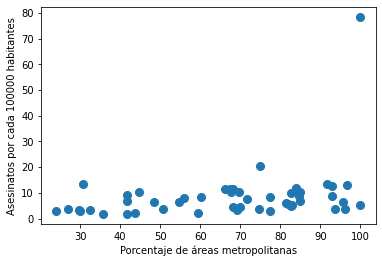

In [7]:
# Scatter plot de M vs MR
plt.scatter(df['M'], df['MR'], s=64)
plt.xlabel('Porcentaje de áreas metropolitanas')
plt.ylabel('Asesinatos por cada 100000 habitantes')
plt.show()

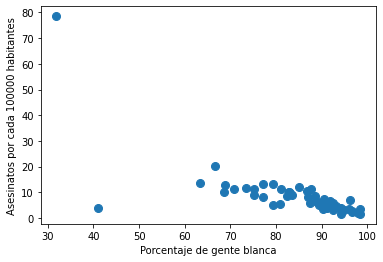

In [8]:
# Scatter plot de W vs MR
plt.scatter(df['W'], df['MR'], s=64)
plt.xlabel('Porcentaje de gente blanca')
plt.ylabel('Asesinatos por cada 100000 habitantes')
plt.show()

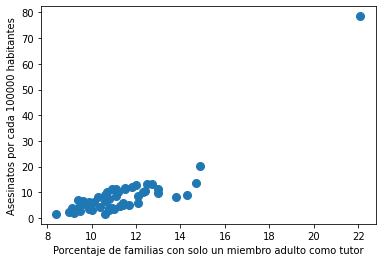

In [9]:
# Scatter plot de S vs MR
plt.scatter(df['S'], df['MR'], s=64)
plt.xlabel('Porcentaje de familias con solo un miembro adulto como tutor')
plt.ylabel('Asesinatos por cada 100000 habitantes')
plt.show()

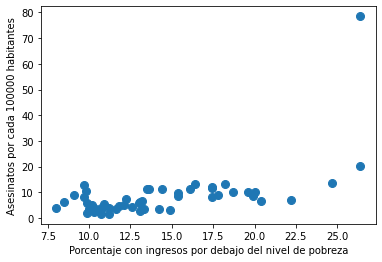

In [10]:
# Scatter plot de P vs MR
plt.scatter(df['P'], df['MR'], s=64)
plt.xlabel('Porcentaje con ingresos por debajo del nivel de pobreza')
plt.ylabel('Asesinatos por cada 100000 habitantes')
plt.show()

### 2. Generación de modelo de regresión lineal

In [11]:
# Generación del modelo lineal
x = df[['M', 'W', 'S', 'P']]
y = df['MR']

reg = sm.OLS(y, x)
model = reg.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                     MR   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              76.47
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                    5.69e-20
Time:                        20:43:05   Log-Likelihood:                         -154.59
No. Observations:                  51   AIC:                                      317.2
Df Residuals:                      47   BIC:                                      324.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 3. Valores de prueba y residuos con validación cruzada

In [12]:
cv = LeaveOneOut()

x = df[['M', 'W', 'S', 'P']]
x = sm.add_constant(x)

y = df['MR']

x_cv = []
y_cv = []
y_pred_cv = []
res_cv = []

for train_index, test_index in cv.split(x):
    
    # Train model
    x_train = x.iloc[train_index]
    y_train = y[train_index]
    
    reg = sm.OLS(y_train, x_train)
    model = reg.fit()
    
    # Test model
    x_test = x.iloc[test_index]
    y_test = y[test_index]
    
    y_pred = model.predict(x_test)
    res = y_test - y_pred
    
    # Save data
    x_cv.append(x_test.to_numpy())    
    y_cv.append(y_test)    
    y_pred_cv.append(y_pred)
    res_cv.append(res) 
    
x_cv = np.array(x_cv).squeeze()
y_cv = np.array(y_cv).squeeze()
y_pred_cv = np.array(y_pred_cv).squeeze()
res_cv = np.array(res_cv).squeeze()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 4. Métricas de rendimiento

In [13]:
print("R^2: ", r2_score(y_pred_cv, y_cv))
print("MSE: ", mse(y_pred_cv, y_cv))
print("RSMSE: ", rmse(y_pred_cv, y_cv))
print("MAE: ", meanabs(y_pred_cv, y_cv))
print("Error estandar: ", stde(y_pred_cv, y_cv, ddof = 3))

R^2:  -0.1023217607254785
MSE:  65.75601730222117
RSMSE:  8.109008404374801
MAE:  4.313789260734517
Error estandar:  8.353754197590513


### 5. Gráfica residuos normalizados del modelo contra los valores ajustados

Text(0, 0.5, 'Normalized residuals')

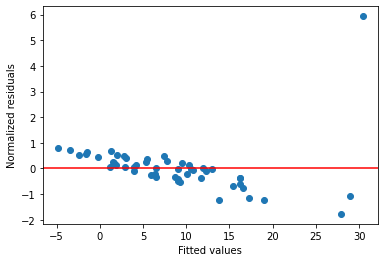

In [14]:
# Gráfica de residuos Vs la variable dependiente.
plt.scatter(y_pred_cv, res_cv/res_cv.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("Fitted values")
plt.ylabel("Normalized residuals")

### Gráfico de cuantil-cuantil

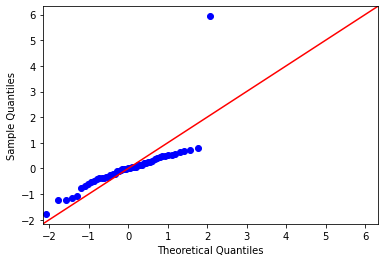

In [15]:
r = np.array(res_cv)
normalized_r = r/r.std()
figure = sm.qqplot(normalized_r, line ='45')
plt.show()

### 6. Prueba de normalidad de los residuos

In [16]:
r = np.array(res_cv)
stat, pval = normal_ad(r)
print("p-value:", pval)

if pval<0.05:
    print("Hay evidencia de que los residuos no vienen de una distribución normal.")
else:
    print("No hay evidencia para rechazar la hipótesis de que los residuos vienen de una distribución normal.")

p-value: 2.3783053789371303e-09
Hay evidencia de que los residuos no vienen de una distribución normal.


### Prueba de varianza

In [17]:
multiplier, pval, fval, fpval = het_breuschpagan(res_cv, x_cv)
print("p-value:", pval)

if pval<0.05:
    print("Hay evidencia de que los residuos no tienen varianza constante.")
else:
    print("No hay evidencia para rechazar la hipótesis de que los residuos no tengan varianza constante.")

p-value: 4.2881023138995785e-06
Hay evidencia de que los residuos no tienen varianza constante.


###  7. Residuos con validación cruzada

Text(0, 0.5, 'Normalized residuals')

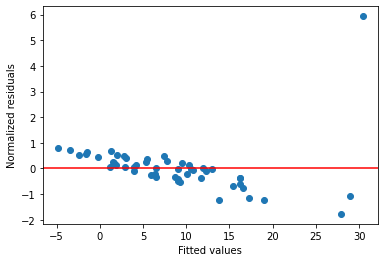

In [18]:
# Gráfica de residuos Vs la variable dependiente.
plt.scatter(y_pred_cv, res_cv/res_cv.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("Fitted values")
plt.ylabel("Normalized residuals")

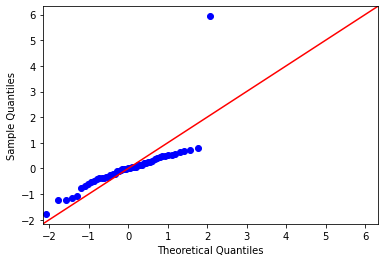

In [19]:
r = np.array(res_cv)
normalized_r = r/r.std()
figure = sm.qqplot(normalized_r, line ='45')
plt.show()

In [20]:
r = np.array(res_cv)
stat, pval = normal_ad(r)
print("p-value:", pval)

if pval<0.05:
    print("Hay evidencia de que los residuos no vienen de una distribución normal.")
else:
    print("No hay evidencia para rechazar la hipótesis de que los residuos vienen de una distribución normal.")

p-value: 2.3783053789371303e-09
Hay evidencia de que los residuos no vienen de una distribución normal.


In [21]:
multiplier, pval, fval, fpval = het_breuschpagan(res_cv, x_cv)
print("p-value:", pval)

if pval<0.05:
    print("Hay evidencia de que los residuos no tienen varianza constante.")
else:
    print("No hay evidencia para rechazar la hipótesis de que los residuos no tengan varianza constante.")

p-value: 4.2881023138995785e-06
Hay evidencia de que los residuos no tienen varianza constante.


### 8. Modelo Cuadrático (cuadrático es mejor)

In [22]:
# Variable dependiente MR, variables independientes M, W, S y P

# Cuadrados de variables predictoras
df['M2'] = df['M']**2
df['W2'] = df['W']**2
df['S2'] = df['S']**2
df['P2'] = df['P']**2

# Producto entre pares de variables
df['MxW'] = df['M']*df['W']
df['MxS'] = df['M']*df['S']
df['MxP'] = df['M']*df['P']
df['WxS'] = df['W']*df['S']
df['WxP'] = df['W']*df['P']
df['SxP'] = df['S']*df['P']

df

,State,VR,MR,M,W,H,P,S,M2,W2,S2,P2,MxW,MxS,MxP,WxS,WxP,SxP
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3,1747.24,5655.04,204.49,82.81,3143.36,597.74,380.38,1075.36,684.32,130.13
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5,4542.76,5402.25,132.25,302.76,4953.90,775.10,1172.76,845.25,1278.90,200.10
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7,1998.09,6872.41,114.49,400.00,3705.63,478.29,894.00,887.03,1658.00,214.00
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1,7174.09,7849.96,146.41,237.16,7504.42,1024.87,1304.38,1072.06,1364.44,186.34
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5,9350.89,6288.49,156.25,331.24,7668.31,1208.75,1759.94,991.25,1443.26,227.50
5,CO,567,5.8,81.8,92.5,84.4,9.9,12.1,6691.24,8556.25,146.41,98.01,7566.50,989.78,809.82,1119.25,915.75,119.79
6,CT,456,6.3,95.7,89.0,79.2,8.5,10.1,9158.49,7921.00,102.01,72.25,8517.30,966.57,813.45,898.90,756.50,85.85
7,DE,686,5.0,82.7,79.4,77.5,10.2,11.4,6839.29,6304.36,129.96,104.04,6566.38,942.78,843.54,905.16,809.88,116.28
8,FL,1206,8.9,93.0,83.5,74.4,17.8,10.6,8649.00,6972.25,112.36,316.84,7765.50,985.80,1655.40,885.10,1486.30,188.68
9,GA,723,11.4,67.7,70.8,70.9,13.5,13.0,4583.29,5012.64,169.00,182.25,4793.16,880.10,913.95,920.40,955.80,175.50


In [23]:
# Generación del modelo lineal
xx = df[['M2', 'W2', 'S2', 'P2']]
yy = df['MR']

reg = sm.OLS(yy, xx)
modelOther = reg.fit()
print(modelOther.summary())

                                 OLS Regression Results                                
Dep. Variable:                     MR   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              124.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                    2.39e-24
Time:                        20:43:07   Log-Likelihood:                         -143.61
No. Observations:                  51   AIC:                                      295.2
Df Residuals:                      47   BIC:                                      302.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
cvv = LeaveOneOut()

xx = df[['M2', 'W2', 'S2', 'P2']]
xx = sm.add_constant(xx)

yy = df['MR']

x_cvv = []
y_cvv = []
y_pred_cvv = []
res_cvv = []

for train_index, test_index in cvv.split(x):
    
    # Train model
    x_train = xx.iloc[train_index]
    y_train = yy[train_index]
    
    reg = sm.OLS(y_train, x_train)
    model = reg.fit()
    
    # Test model
    x_test = x.iloc[test_index]
    y_test = y[test_index]
    
    y_pred = model.predict(x_test)
    res = y_test - y_pred
    
    # Save data
    x_cvv.append(x_test.to_numpy())    
    y_cvv.append(y_test)    
    y_pred_cvv.append(y_pred)
    res_cvv.append(res) 
    
x_cvv = np.array(x_cvv).squeeze()
y_cvv = np.array(y_cvv).squeeze()
y_pred_cvv = np.array(y_pred_cvv).squeeze()
res_cvv = np.array(res_cvv).squeeze()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
print("R^2: ", r2_score(y_pred_cvv, y_cvv))
print("MSE: ", mse(y_pred_cvv, y_cvv))
print("RSMSE: ", rmse(y_pred_cvv, y_cvv))
print("MAE: ", meanabs(y_pred_cvv, y_cvv))
print("Error estandar: ", stde(y_pred_cvv, y_cvv, ddof = 3))

R^2:  -100.76813453607994
MSE:  407.53836897478203
RSMSE:  20.187579571974002
MAE:  18.16958346973129
Error estandar:  9.068759196036831


Text(0, 0.5, 'Standarized residuals')

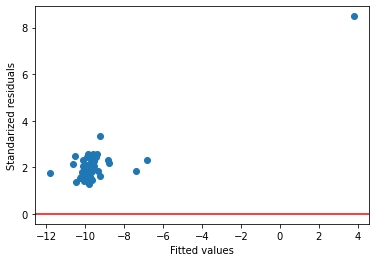

In [26]:
# Gráfica de residuos
y_pred = model.predict(x)
res2 = model.resid

plt.scatter(y_pred_cvv, res_cvv/res_cvv.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("Fitted values")
plt.ylabel("Standarized residuals")

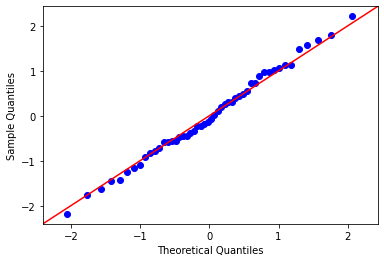

In [27]:
# Gráfico cuantil-cuantil
figure2 = sm.qqplot(res2/res2.std(), line ='45')
plt.show()

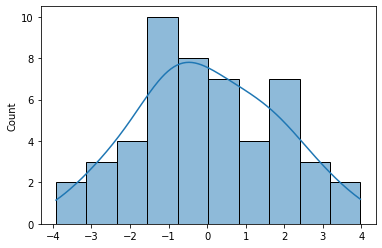

In [28]:
# Histograma de residuos
sns.histplot(res2, kde=True, bins = 10)

In [29]:
rr = np.array(res_cvv)
stat, pval2 = normal_ad(rr)
print("p-value:", pval2)

if pval2<0.05:
    print("Hay evidencia de que los residuos no vienen de una distribución normal.")
else:
    print("No hay evidencia para rechazar la hipótesis de que los residuos vienen de una distribución normal.")

p-value: 4.076446502960129e-15
Hay evidencia de que los residuos no vienen de una distribución normal.


In [30]:
multiplier2, pval2, fval2, fpval2 = het_breuschpagan(res_cvv, x_cvv)
print("p-value:", pval2)

if pval2<0.05:
    print("Hay evidencia de que los residuos no tienen varianza constante.")
else:
    print("No hay evidencia para rechazar la hipótesis de que los residuos no tengan varianza constante.")

p-value: 8.39171286625041e-07
Hay evidencia de que los residuos no tienen varianza constante.


### 9. Conclusiones

**Ejercicio 2 (50 puntos)**
El conjunto de datos de precios de vivienda de California (un clásico de Kaggle) contiene registros de precios de viviendas de diferentes distritos obtenidos de un censo de 1990. Para cada registro, se tiene lo siguiente:

* longitude - longitud de la localización del distrito
* latitude - latitud de la localización del distrito
* housing_median_age - antigüedad mediana de las viviendas
* total_rooms - total de cuartos
* total_bedrooms - total de baños
* population - población del distrito
* households - cantidad de hogares
* median_income- ingreso medio de la localidad
* median_house_value - valor de la mediana del valor de la casa
* ocean_proximity - proximidad al oceano

Para este conjunto, realice lo siguiente:

1. Elimine todos los registros que tengan NaN o datos faltantes.
2. Separe aleatoriamente los datos en dos conjuntos: entrenamiento (50%) y prueba (50%).
3. Con el conjunto de entrenamiento, ajuste un modelo de regresión lineal para la variable de respuesta median_house_value y las variables predictoras asignadas a tu matrícula.
4. Evalúe su modelo con el conjunto de prueba utilizando las métricas R2, MSE, RSMSE, MAU y los errores estándar residuales.
5. Para el modelo, genere el gráfico de influencia correspondiente. 
6. ¿Identificas alguna observación importante que merezca atención?
Identifique gráficamente las observaciones del conjunto de entrenamiento que tengan las siguientes propiedades:
* Valores atípicos de residuos
* Valores altos de apalancamiento
* Valores altos de distancia de Cook
* Valores altos de DFFIT
* Valores altos de DFBetas
7. Elimine las observaciones que tengan con residuos atípicos, y vuelva a entrenar el modelo con los datos eliminados. Evalúa el nuevo modelo con el conjunto de prueba, y compare los resultados con los obtenidos anteriormente. ¿Se nota alguna mejora?
8. Repita el paso anterior, pero para el nivel de apalancamiento. Luego haga lo mismo para la distancia de Cook, los valores DFFIT y DFBetas. ¿Con qué método se obtiene un mejor modelo?
9. Elimine todas las observaciones que cumpla con alguno de los criterios, y entrene y evalúe el modelo. ¿Se observa alguna mejora? ¿Qué estrategia utilizarías con la información de influencia para mejorar el ajuste de un modelo de regresión lineal?

Variables a utilizar (penúltimo número de matrícula):
> 7: longitude , latitude , housing_median_age, total_rooms, population, households, median_income

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/IA/IA2/housing.csv')
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### 1. Limpiar datos

In [32]:
Nr2, Nc2 = df2.shape
print("Number of observations (rows)  = {0:0d}".format(Nr2))
print("Number of variables(columns)   = {0:0d}".format(Nc2))

print(df2.columns)

Number of observations (rows)  = 20640
Number of variables(columns)   = 10
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [33]:
df2.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [34]:
df2.dropna(inplace=True)

In [35]:
df2.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [36]:
# Variable dependiente median_house_value
# Variables independientes longitude , latitude , housing_median_age, total_rooms, population, households, median_income
df2.drop(['total_bedrooms', 'ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0


### 2. Separar conjuntos de datos en entrenamiento y prueba

In [37]:
X = df2[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income']]
Y = df2['median_house_value']

# Dividir los datos en dos partes de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5)

### 3. Modelo de regresión lineal (conjunto de entrenamiento)

In [38]:
reg_2 = sm.OLS(y_train, X_train)
model_2 = reg_2.fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                          1.279e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:43:10   Log-Likelihood:                     -1.2933e+05
No. Observations:               10216   AIC:                                  2.587e+05
Df Residuals:                   10209   BIC:                                  2.587e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### 4. Métricas utilizando conjunto de prueba

In [39]:
reg_3 = sm.OLS(y_test, X_test)
model_3 = reg_3.fit()

In [40]:
y_pred_3 = model_3.predict(X_test)

In [41]:
print("R^2: ", r2_score(y_test.squeeze(), y_pred_3))
print("MSE: ", mse(y_test.squeeze(), y_pred_3))
print("RSMSE: ", rmse(y_test.squeeze(), y_pred_3))
print("MAE: ", meanabs(y_test.squeeze(), y_pred_3))
print("Error estandar: ", stde(y_test.squeeze(), y_pred_3, ddof = 3))

R^2:  0.5857070332818048
MSE:  5461621830.5921955
RSMSE:  73902.7863520192
MAE:  54673.642806911186
Error estandar:  73913.36037907888


### 5. Gráfico de influencia

In [42]:
influence = model_2.get_influence()
summary = influence.summary_frame()
summary

,dfb_longitude,dfb_latitude,dfb_housing_median_age,dfb_total_rooms,dfb_population,dfb_households,dfb_median_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
11408,-0.001889,-0.001847,-0.001443,0.000501,-0.000049,-0.000721,0.001574,2.385332e-06,0.218588,0.000349,0.004086,0.218578,0.004086
1506,0.002922,0.004294,-0.010657,-0.003229,-0.011444,0.011461,0.001136,5.170409e-05,0.595879,0.001018,0.019024,0.595860,0.019024
10959,0.000388,0.000426,-0.000191,0.000674,-0.002125,0.000974,-0.000255,8.786502e-07,-0.093138,0.000709,-0.002480,-0.093133,-0.002480
5964,-0.002606,-0.004983,0.011658,0.044206,0.010676,-0.033053,-0.008550,5.419017e-04,0.701014,0.007660,0.061590,0.700997,0.061588
5885,-0.000561,-0.000619,0.000996,0.000468,-0.000337,-0.000223,-0.000263,3.536365e-07,0.080837,0.000379,0.001573,0.080833,0.001573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,0.001559,-0.000022,0.007960,0.000701,0.000176,0.000942,0.003408,1.489541e-05,-0.431185,0.000561,-0.010211,-0.431168,-0.010211
14720,0.011795,0.011372,0.001660,-0.005741,0.005008,0.002369,0.003395,3.001699e-05,-0.753246,0.000370,-0.014495,-0.753230,-0.014495
5317,-0.017325,-0.018083,-0.011933,-0.006924,-0.046422,0.044243,0.012866,5.936585e-04,2.351067,0.000751,0.064464,2.351589,0.064478
13501,0.003045,0.002843,-0.001920,-0.000409,-0.006550,0.004528,0.004425,1.743250e-05,-0.611719,0.000326,-0.011047,-0.611700,-0.011046


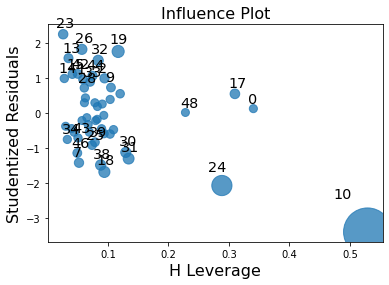

In [43]:
fig = sm.graphics.influence_plot(model, criterion="cooks", alpha = 0.5)

### 6. Gráficas (Valores atípicos, Valores altos de apalancamiento, distancia de Cook, DFFIT y DFBetas)

In [44]:
# Obtención de las observaciones con residuos atípicos
student_resid = influence.resid_studentized_external

outlier_test = abs(student_resid) > 2
outlier_points = np.where(outlier_test)

summary.iloc[outlier_points]

,dfb_longitude,dfb_latitude,dfb_housing_median_age,dfb_total_rooms,dfb_population,dfb_households,dfb_median_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
15684,0.029519,0.024479,0.051291,-0.000397,-0.031071,0.028870,0.014437,0.000752,2.608737,0.000773,0.072542,2.609479,0.072562
15656,0.033571,0.027386,0.048490,-0.038603,-0.060521,0.089834,0.016939,0.001777,2.501348,0.001984,0.111524,2.501992,0.111553
1581,0.026307,0.025722,-0.002181,0.003322,0.005132,-0.008301,0.035644,0.000422,2.320343,0.000549,0.054363,2.320842,0.054374
8832,-0.013063,-0.015684,0.007604,-0.027104,-0.049917,0.064308,0.013044,0.000808,2.564348,0.000859,0.075203,2.565049,0.075223
4028,-0.011434,-0.013515,0.016096,0.006588,-0.004335,-0.004804,0.011296,0.000195,2.131790,0.000300,0.036957,2.132160,0.036963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,0.006046,0.011728,-0.055484,0.007342,0.000695,-0.004804,-0.012725,0.000767,-3.328669,0.000484,-0.073278,-3.330313,-0.073314
18275,0.020312,0.020459,0.004870,-0.010991,-0.005725,0.007518,0.028308,0.000363,2.968136,0.000288,0.050378,2.969272,0.050397
870,0.001287,0.008862,-0.046589,-0.010642,-0.003782,0.003174,-0.001542,0.000430,2.078026,0.000697,0.054862,2.078364,0.054871
17276,-0.037136,-0.037458,0.036632,0.013657,-0.028145,0.005042,-0.030137,0.000876,3.907807,0.000402,0.078322,3.910542,0.078377


Text(0, 0.5, 'Studentized residuals')

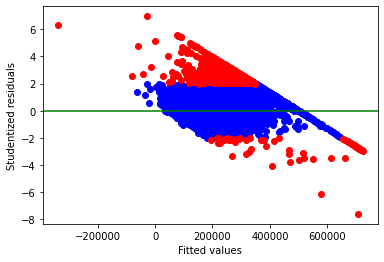

In [45]:
# Gráfico de los residuos estudentizados
y_pred_4 = model_2.predict(X_train)

plt.axhline(y = 0.0, color = 'g', linestyle = '-')

plt.scatter(y_pred_4[~outlier_test], student_resid[~outlier_test], color = 'b')
plt.scatter(y_pred_4[outlier_test], student_resid[outlier_test], color = 'r')

plt.xlabel("Fitted values")
plt.ylabel("Studentized residuals")

In [46]:
# Número de puntos
n = 30

# Obtención de las observaciones con valores altos de apalancamiento
leverage = influence.hat_matrix_diag

p = X_train.shape[1] - 1
cutoff = (2*p+2)/n

leverage_test = leverage > cutoff
high_leverage_points = np.where(leverage_test)

summary.iloc[high_leverage_points]

,dfb_longitude,dfb_latitude,dfb_housing_median_age,dfb_total_rooms,dfb_population,dfb_households,dfb_median_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Apalancamiento')

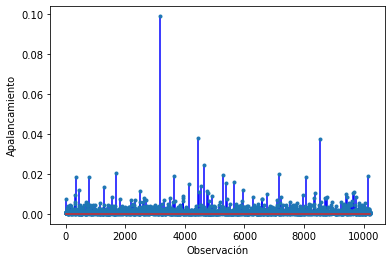

In [47]:
# Gráfico de valores de apalancamiento
plt.stem(leverage, linefmt ='b', markerfmt ='.')
plt.scatter(high_leverage_points, leverage[leverage_test], color = "r")
plt.xlabel("Observación")
plt.ylabel("Apalancamiento")

In [48]:
# Obtención de las observaciones con valores altos de distancia de cook
(cooks, p) = influence.cooks_distance

cutoff = 3*cooks.mean()

cook_distance_test = cooks > cutoff
high_cook_distance_points = np.where(cook_distance_test)

summary.iloc[high_cook_distance_points]

,dfb_longitude,dfb_latitude,dfb_housing_median_age,dfb_total_rooms,dfb_population,dfb_households,dfb_median_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
15684,0.029519,0.024479,0.051291,-0.000397,-0.031071,0.028870,0.014437,0.000752,2.608737,0.000773,0.072542,2.609479,0.072562
15656,0.033571,0.027386,0.048490,-0.038603,-0.060521,0.089834,0.016939,0.001777,2.501348,0.001984,0.111524,2.501992,0.111553
8832,-0.013063,-0.015684,0.007604,-0.027104,-0.049917,0.064308,0.013044,0.000808,2.564348,0.000859,0.075203,2.565049,0.075223
11520,-0.012360,-0.004841,0.020372,0.040406,-0.009898,-0.021385,-0.119660,0.002352,-2.062451,0.003856,-0.128321,-2.062780,-0.128341
116,-0.015444,-0.014020,-0.000035,0.039535,0.034828,-0.066566,-0.012664,0.000693,-1.047165,0.004407,-0.069672,-1.047170,-0.069672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15661,0.027427,0.034995,-0.024148,-0.090042,-0.071224,0.132038,-0.021985,0.003815,4.785877,0.001165,0.163415,4.791020,0.163591
4614,0.010146,0.006076,0.014050,-0.056761,0.022144,0.040753,0.017925,0.000705,1.288737,0.002964,0.070265,1.288778,0.070267
20367,-0.016775,-0.013729,-0.049945,-0.018277,0.001046,0.003331,0.041588,0.000815,2.130672,0.001254,0.075510,2.131042,0.075523
9188,0.006046,0.011728,-0.055484,0.007342,0.000695,-0.004804,-0.012725,0.000767,-3.328669,0.000484,-0.073278,-3.330313,-0.073314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Distancia de cook')

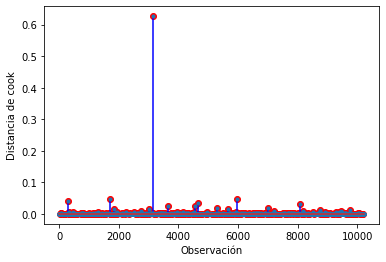

In [49]:
# Gráfico de distancias de cook
plt.stem(cooks, linefmt ='b', markerfmt ='.')
plt.scatter(high_cook_distance_points, cooks[high_cook_distance_points], color = "r")
plt.xlabel("Observación")
plt.ylabel("Distancia de cook")

In [50]:
# Obtención de las observaciones con valores altos de DFFIT
(dffits, p) = influence.dffits

cutoff = 2/math.sqrt(p/n)

dffit_test = abs(dffits) > cutoff
high_dffit_points = np.where(dffit_test)

summary.iloc[high_dffit_points]

,dfb_longitude,dfb_latitude,dfb_housing_median_age,dfb_total_rooms,dfb_population,dfb_households,dfb_median_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'DFFIT')

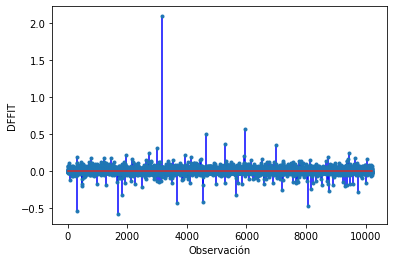

In [51]:
# Gráfico de valores DFFIT
plt.stem(dffits, linefmt ='b', markerfmt ='.')
plt.scatter(high_dffit_points, dffits[high_dffit_points], color = "r")
plt.xlabel("Observación")
plt.ylabel("DFFIT")

In [52]:
# Obtención de las observaciones con valores altos de DFBeta
cutoff =  2/math.sqrt(n)

dfbetas = [X_train for X_train in summary.columns.to_list() if ('dfb' in X_train)]

high_beta_test = []
high_beta_points = []

for beta in dfbetas:    
    
    test = (summary[beta] > cutoff).to_numpy()    
    high_beta_test.append(test)
    
    points = np.where(dffit_test)
    high_beta_points.append(points)
    
    print(summary[beta].iloc[points])

Series([], Name: dfb_longitude, dtype: float64)
Series([], Name: dfb_latitude, dtype: float64)
Series([], Name: dfb_housing_median_age, dtype: float64)
Series([], Name: dfb_total_rooms, dtype: float64)
Series([], Name: dfb_population, dtype: float64)
Series([], Name: dfb_households, dtype: float64)
Series([], Name: dfb_median_income, dtype: float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warni

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


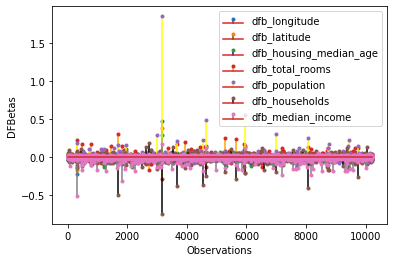

In [69]:
# Gráfico de valores DFBeta
color = ["red", "green", "blue", "orange", "yellow", "black", "gray"]


for i in range(len(dfbetas)):
    plt.stem(summary[dfbetas[i]], linefmt = color[i], markerfmt ='.', label = dfbetas[i])
    # print(summary[dfbetas[i]])    
    
plt.xlabel("Observations")
plt.ylabel("DFBetas")
plt.legend()